# Table of Contents

- [Loading the files](#loading-the-files)
- [Getting an idea about the data sets](#getting-an-idea-about-the-data-sets)
- [Handling missing values](#handling-missing-values)
- [Encoding categorical variables](#encoding-categorical-variables)
- [Separating training data and validation data](#separating-training-data-and-validation-data)
- [Using various regression models](#using-various-regression-models)
- [Using Stacking Regressor](#using-stacking-regressor)
- [Getting the average of the predictions of the best models](#getting-the-average-of-the-predictions-of-best-models)
- [Making final predictions using the best method](#making-final-predictions-using-the-best-method)

# Loading the files

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
# We have to drop the 'id' column from the training data and test data
train_data = train_data.drop('Id', axis=1)

test_data_id = test_data['Id']
test_data = test_data.drop('Id', axis=1)

In [4]:
train_data.shape

(31599, 14)

# Getting an idea about the data sets

## Getting the column names

In [5]:
print(train_data.columns)

Index(['Property_Type', 'Property_Area', 'Number_of_Windows',
       'Number_of_Doors', 'Furnishing', 'Frequency_of_Powercuts',
       'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Crime_Rate',
       'Dust_and_Noise', 'Air_Quality_Index', 'Neighborhood_Review',
       'Habitability_score'],
      dtype='object')


## Finding the percentage of missing values in each column

In [6]:
print(train_data.isnull().sum()/len(train_data))

Property_Type             0.000000
Property_Area             0.000000
Number_of_Windows         0.042185
Number_of_Doors           0.000000
Furnishing                0.026203
Frequency_of_Powercuts    0.035096
Power_Backup              0.000000
Water_Supply              0.000000
Traffic_Density_Score     0.000000
Crime_Rate                0.019906
Dust_and_Noise            0.031615
Air_Quality_Index         0.000000
Neighborhood_Review       0.000000
Habitability_score        0.000000
dtype: float64


Since the percentages of null values is really low, We have to handle missing values without dropping rows and columns.

# Handling missing values

## Imputing numerical variables

### Getting the distritutions

In [7]:
# We should get the numerical columns and categorical columns separately
numerical_columns = train_data.select_dtypes(include=['int64','float64']).columns
categorical_columns = train_data.select_dtypes(include=['object','bool']).columns

In [8]:
print(numerical_columns)
print(categorical_columns)

Index(['Property_Area', 'Number_of_Windows', 'Number_of_Doors',
       'Frequency_of_Powercuts', 'Traffic_Density_Score', 'Air_Quality_Index',
       'Neighborhood_Review', 'Habitability_score'],
      dtype='object')
Index(['Property_Type', 'Furnishing', 'Power_Backup', 'Water_Supply',
       'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')


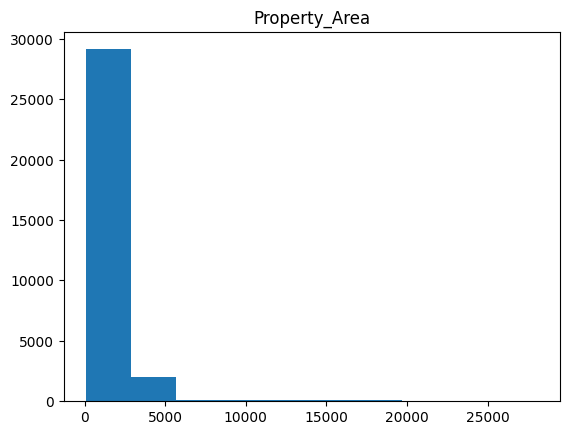

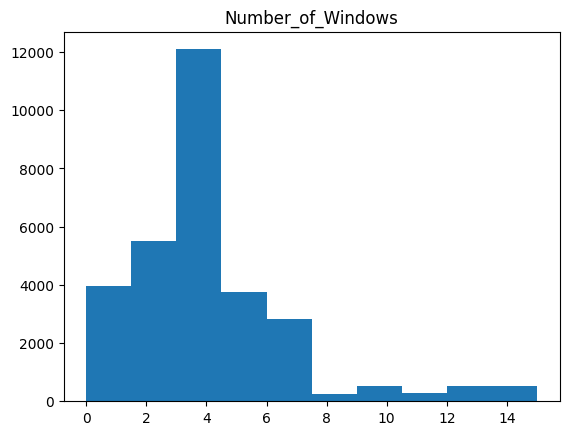

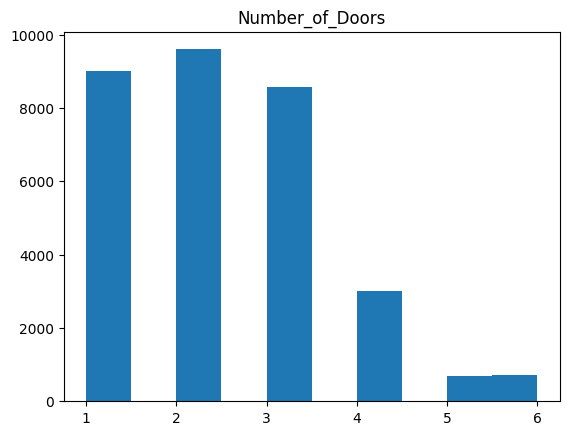

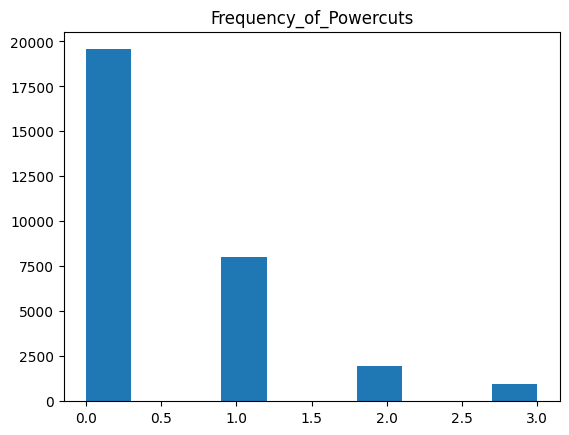

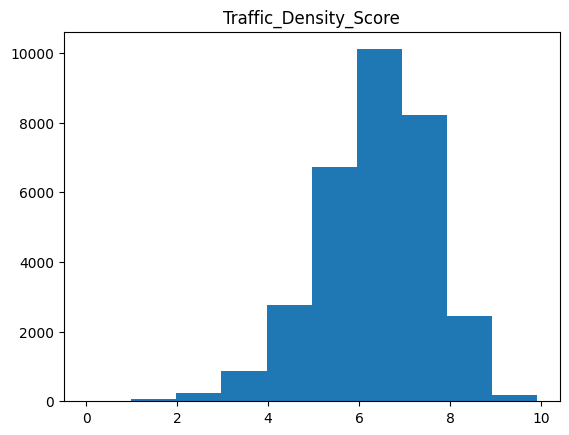

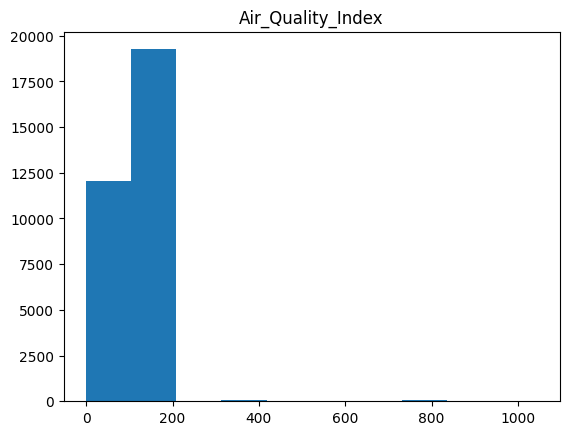

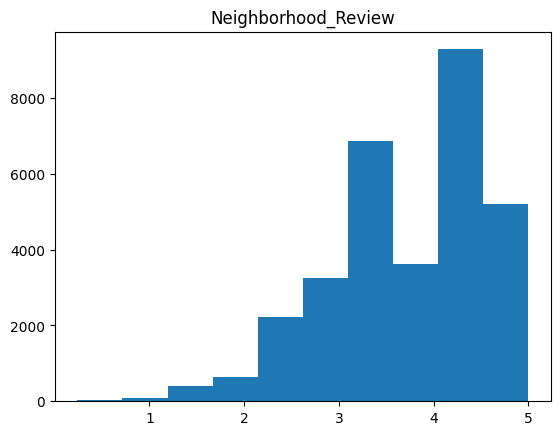

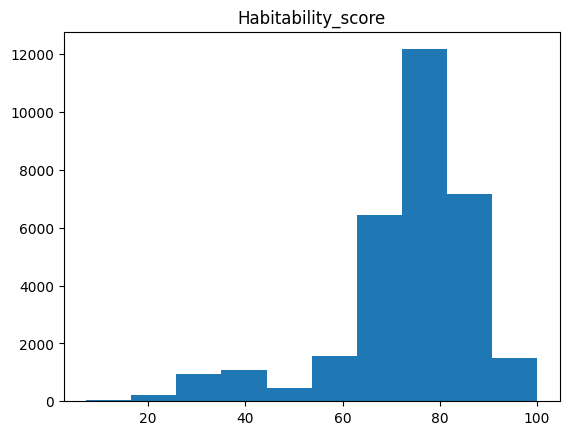

In [9]:
# Plotting the distribution of the numerical columns
import matplotlib.pyplot as plt
import seaborn as sns

for i in numerical_columns:
    plt.hist(train_data[i])
    plt.title(i)
    plt.show()

### Imputing missing values

There are no normal distributions in the numerical columns. <br>
We impute the missing values in the numerical columns with the median of the values in the column.

In [10]:
try:
    for i in numerical_columns:
        if train_data[i].isnull().sum() > 0:
            train_data[i].fillna(train_data[i].median(), inplace=True)
        
        if test_data[i].isnull().sum() > 0:
            test_data[i].fillna(train_data[i].median(), inplace=True)   
except:
    pass 

C:\Users\gayka\AppData\Local\Temp\ipykernel_86596\3311248575.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[i].fillna(train_data[i].median(), inplace=True)
C:\Users\gayka\AppData\Local\Temp\ipykernel_86596\3311248575.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [11]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Property_Type               0
Property_Area               0
Number_of_Windows           0
Number_of_Doors             0
Furnishing                828
Frequency_of_Powercuts      0
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                629
Dust_and_Noise            999
Air_Quality_Index           0
Neighborhood_Review         0
Habitability_score          0
dtype: int64
Property_Type               0
Property_Area               0
Number_of_Windows           0
Number_of_Doors             0
Furnishing                214
Frequency_of_Powercuts      0
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                158
Dust_and_Noise            220
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64


## Imputing categorical variables

We impute the missing values in the categorical columns with the mode of the values in the column.

In [12]:
categorical_columns

Index(['Property_Type', 'Furnishing', 'Power_Backup', 'Water_Supply',
       'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')

In [13]:
for i in categorical_columns:
    if train_data[i].isnull().sum() > 0:
        train_data[i].fillna(train_data[i].mode()[0], inplace=True)
    
    if test_data[i].isnull().sum() > 0:
        test_data[i].fillna(train_data[i].mode()[0], inplace=True)

C:\Users\gayka\AppData\Local\Temp\ipykernel_86596\3470419764.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[i].fillna(train_data[i].mode()[0], inplace=True)
C:\Users\gayka\AppData\Local\Temp\ipykernel_86596\3470419764.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

# Encoding categorical variables

## Handling the variable 'Property_Type'

In [14]:
train_data['Property_Type'].value_counts()

Property_Type
Apartment             11673
Single-family home     9146
Duplex                 4671
Bungalow               3392
Container Home         2310
#R%$G&867               407
Name: count, dtype: int64

We can use one hot endoding to convert the column 'Property_Type' to numerical values.

In [15]:
train_data = pd.get_dummies(train_data, columns=['Property_Type'])
test_data = pd.get_dummies(test_data, columns=['Property_Type'])

## Handling the variable 'Furnishing' 

In [16]:
test_data['Furnishing'].value_counts()

Furnishing
Semi_Furnished     4257
Unfurnished        2065
Fully Furnished    1578
Name: count, dtype: int64

We can use a mapping to convert the column 'Furnishing' to numerical values.

In [17]:
furnishing_mapping = {'Unfurnished':0, 'Semi_Furnished':1, 'Fully Furnished':2}
train_data['Furnishing'] = train_data['Furnishing'].map(furnishing_mapping)
test_data['Furnishing'] = test_data['Furnishing'].map(furnishing_mapping)

## Handling the variable 'Power_Backup' 

In [18]:
test_data['Power_Backup'].value_counts()

Power_Backup
No               5918
Yes              1833
NOT MENTIONED     149
Name: count, dtype: int64

I turned "NOT MENTIONED" to "No" since "No" is the mode of that column.

In [19]:
train_data['Power_Backup'] = train_data['Power_Backup'].replace('NOT MENTIONED', 'No')
test_data['Power_Backup'] = test_data['Power_Backup'].replace('NOT MENTIONED', 'No')

We can use a mapping to convert the column 'Power_Backup' to numerical values.

In [20]:
train_data['Power_Backup'] = train_data['Power_Backup'].map({'No':0, 'Yes':1})
test_data['Power_Backup'] = test_data['Power_Backup'].map({'No':0, 'Yes':1})

## Handling the variable 'Water_Supply'

In [21]:
train_data['Water_Supply'].value_counts()

Water_Supply
All time                   15585
Once in a day - Morning     7887
Once in a day - Evening     6300
Once in two days            1569
NOT MENTIONED                258
Name: count, dtype: int64

I turned "NOT MENTIONED" to "All time" since "All time" is the mode of that column.

In [22]:
train_data['Water_Supply'] = train_data['Water_Supply'].replace('NOT MENTIONED', 'All time')
test_data['Water_Supply'] = test_data['Water_Supply'].replace('NOT MENTIONED', 'All time')

We can use a mapping to convert the column 'Water_Supply' to numerical values.

In [23]:
train_data = pd.get_dummies(train_data, columns=['Water_Supply'])
test_data = pd.get_dummies(test_data, columns=['Water_Supply'])

## Handling the variable 'Crime_Rate'

In [24]:
train_data['Crime_Rate'].value_counts()

Crime_Rate
Well below average        16162
Slightly below average     9334
Slightly above average     4216
Well above average         1887
Name: count, dtype: int64

We can use a mapping to convert the column 'Crime_Rate' to numerical values.

In [25]:
crime_rate_mapping = {'Well below average':0, 'Slightly below average':1, 'Slightly above average':2, 'Well above average':3}

train_data['Crime_Rate'] = train_data['Crime_Rate'].map(crime_rate_mapping)
test_data['Crime_Rate'] = test_data['Crime_Rate'].map(crime_rate_mapping)

## Handling the variable 'Dust_and_Noise'

In [26]:
train_data['Dust_and_Noise'].value_counts()

Dust_and_Noise
Medium    27375
High       2572
Low        1652
Name: count, dtype: int64

We can use a mapping to convert the column 'Dust_and_Noise' to numerical values.

In [27]:
dust_and_noise_mapping = {'Low':0, 'Medium':1, 'High':2}

train_data['Dust_and_Noise'] = train_data['Dust_and_Noise'].map(dust_and_noise_mapping)
test_data['Dust_and_Noise'] = test_data['Dust_and_Noise'].map(dust_and_noise_mapping)

## Checking for the final status of the data set

In [28]:
numerical_columns = train_data.select_dtypes(include=['int64','float64']).columns
numerical_columns

Index(['Property_Area', 'Number_of_Windows', 'Number_of_Doors', 'Furnishing',
       'Frequency_of_Powercuts', 'Power_Backup', 'Traffic_Density_Score',
       'Crime_Rate', 'Dust_and_Noise', 'Air_Quality_Index',
       'Neighborhood_Review', 'Habitability_score'],
      dtype='object')

In [29]:
categorical_columns = train_data.select_dtypes(include=['object']).columns
categorical_columns

Index([], dtype='object')

In [30]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Property_Area                           0
Number_of_Windows                       0
Number_of_Doors                         0
Furnishing                              0
Frequency_of_Powercuts                  0
Power_Backup                            0
Traffic_Density_Score                   0
Crime_Rate                              0
Dust_and_Noise                          0
Air_Quality_Index                       0
Neighborhood_Review                     0
Habitability_score                      0
Property_Type_#R%$G&867                 0
Property_Type_Apartment                 0
Property_Type_Bungalow                  0
Property_Type_Container Home            0
Property_Type_Duplex                    0
Property_Type_Single-family home        0
Water_Supply_All time                   0
Water_Supply_Once in a day - Evening    0
Water_Supply_Once in a day - Morning    0
Water_Supply_Once in two days           0
dtype: int64
Property_Area                           0
Number_of_Windows    

In [31]:
train_data.shape

(31599, 22)

# Separating training data and validation data

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

X = train_data.drop('Habitability_score', axis=1)
Y = train_data['Habitability_score']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=2)

## Scaling the data for necessary algorithms

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)

# Using various regression models

These are the regression models used for comparison.
- [Linear Regression](#linear-regression)
- [Random Forest Regressor](#random-forest-regressor)
- [XGB Regressor](#xgb-regressor)
- [Neural Network Regressor](#neural-network-regressor)
- [SVM Regressor](#svm-regressor)
- [Lasso Regressor](#lasso-regressor)
- [Ridge Regressor](#ridge-regressor)
- [Decision Tree Regressor](#decision-tree-regressor)

## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_val)

print(mean_squared_error(Y_val, Y_pred))
print(root_mean_squared_error(Y_val, Y_pred))
print(r2_score(Y_val, Y_pred))

84.37361462023249
9.18551112460447
0.5765871799481448


Since the Mean Square Error was considerably high, I tried other approaches.

## Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=2)

# Tuning the hyperparameters of the Random Forest Regressor
param_grid = {'n_estimators':[100, 200, 300, 400, 500], 'max_depth':[10, 20, 30, 40, 50]}
grid_search = GridSearchCV(rf, param_grid, cv=5)

grid_search.fit(X_train, Y_train)

grid_search.best_params_

{'max_depth': 20, 'n_estimators': 400}

In [36]:
# Making predictions using the best hyperparameters
rf_new = RandomForestRegressor(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], random_state=2)

rf_new.fit(X_train, Y_train)

Y_pred_rf = rf_new.predict(X_val)

print(mean_squared_error(Y_val, Y_pred_rf))
print(root_mean_squared_error(Y_val, Y_pred_rf))
print(r2_score(Y_val, Y_pred_rf))

35.992179524839244
5.999348258339338
0.8193801427019765


## XGB Regressor

In [37]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)

# Tuning the hyperparameters of the XGB Regressor
param_grid_xgb = {'n_estimators':[100, 200, 300, 400, 500], 'max_depth':[10, 20, 30, 40, 50]}
grid_search_xgb = GridSearchCV(xgb_reg, param_grid_xgb, cv=5)

grid_search_xgb.fit(X_train, Y_train)

grid_search_xgb.best_params_

{'max_depth': 10, 'n_estimators': 300}

In [38]:
# Making predictions using the best hyperparameters
xgb_new = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=1, learning_rate=0.1, max_depth=grid_search_xgb.best_params_['max_depth'], alpha=100, n_estimators=grid_search_xgb.best_params_['n_estimators'])

xgb_new.fit(X_train, Y_train)

Y_pred_xgb = xgb_new.predict(X_val)

print(mean_squared_error(Y_val, Y_pred_xgb))
print(root_mean_squared_error(Y_val, Y_pred_xgb))
print(r2_score(Y_val, Y_pred_xgb))

36.536096409187415
6.04450960866036
0.8166506000254861


## Neural Network Regressor

In [39]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=2)

# Tuning the hyperparameters of the Neural Network Regressor
param_grid_mlp = {'hidden_layer_sizes':[(100, 100), (200, 200), (300, 300)], 'max_iter':[1000, 2000, 3000]}
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5)

grid_search_mlp.fit(X_train_scaled, Y_train)

grid_search_mlp.best_params_

{'hidden_layer_sizes': (100, 100), 'max_iter': 1000}

In [40]:
# Making predictions using the best hyperparameters
mlp_new = MLPRegressor(hidden_layer_sizes=grid_search_mlp.best_params_['hidden_layer_sizes'], max_iter=grid_search_mlp.best_params_['max_iter'], random_state=2)

mlp_new.fit(X_train_scaled, Y_train)

Y_pred_mlp = mlp_new.predict(X_val_scaled)

print(mean_squared_error(Y_val, Y_pred_mlp))
print(root_mean_squared_error(Y_val, Y_pred_mlp))
print(r2_score(Y_val, Y_pred_mlp))

34.81364162029318
5.900308603818378
0.8252944093829513


## SVM Regressor

In [41]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')

# Tuning the hyperparameters of the SVM Regressor
param_grid_svr = {'C':[1, 10, 100, 1000], 'gamma':[0.1, 0.01, 0.001, 0.0001]}
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5)

grid_search_svr.fit(X_train_scaled, Y_train)

grid_search_svr.best_params_

{'C': 10, 'gamma': 0.1}

In [42]:
# Making predictions using the best hyperparameters
svr_new = SVR(C=grid_search_svr.best_params_['C'], gamma=grid_search_svr.best_params_['gamma'])

svr_new.fit(X_train_scaled, Y_train)

Y_pred_svr = svr_new.predict(X_val_scaled)

print(mean_squared_error(Y_val, Y_pred_svr))
print(root_mean_squared_error(Y_val, Y_pred_svr))
print(r2_score(Y_val, Y_pred_svr))

47.987984777753354
6.927336052029911
0.7591814922851285


## Lasso Regressor

In [43]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)

# Tuning the hyperparameters of the Lasso Regressor
param_grid_lasso = {'alpha':[0.1, 1, 10, 100, 1000]}

grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5)

grid_search_lasso.fit(X_train_scaled, Y_train)

grid_search_lasso.best_params_

{'alpha': 0.1}

In [44]:
# Making predictions using the best hyperparameters
lasso_new = Lasso(alpha=grid_search_lasso.best_params_['alpha'])

lasso_new.fit(X_train_scaled, Y_train)

Y_pred_lasso = lasso_new.predict(X_val_scaled)

print(mean_squared_error(Y_val, Y_pred_lasso))
print(root_mean_squared_error(Y_val, Y_pred_lasso))
print(r2_score(Y_val, Y_pred_lasso))

84.63439905323906
9.199695595683536
0.5752784832341076


## Ridge Regressor

In [45]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)

# Tuning the hyperparameters of the Ridge Regressor
param_grid_ridge = {'alpha':[0.1, 1, 10, 100, 1000]}

grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5)

grid_search_ridge.fit(X_train_scaled, Y_train)

grid_search_ridge.best_params_

{'alpha': 10}

In [46]:
# Making predictions using the best hyperparameters
ridge_new = Ridge(alpha=grid_search_ridge.best_params_['alpha'])

ridge_new.fit(X_train_scaled, Y_train)

Y_pred_ridge = ridge_new.predict(X_val_scaled)

print(mean_squared_error(Y_val, Y_pred_ridge))
print(root_mean_squared_error(Y_val, Y_pred_ridge))
print(r2_score(Y_val, Y_pred_ridge))

84.37434428215676
9.1855508426091
0.5765835182795719


## Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5)

# Tuning the hyperparameters of the Decision Tree Regressor
param_grid_dt = {'max_depth':[5, 10, 15, 20, 25]}

grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)

grid_search_dt.fit(X_train, Y_train)

grid_search_dt.best_params_

{'max_depth': 10}

In [48]:
# Making predictions using the best hyperparameters
dt_new = DecisionTreeRegressor(max_depth=grid_search_dt.best_params_['max_depth'])

dt_new.fit(X_train, Y_train)

Y_pred_dt = dt_new.predict(X_val)

print(mean_squared_error(Y_val, Y_pred_dt))
print(root_mean_squared_error(Y_val, Y_pred_dt))
print(r2_score(Y_val, Y_pred_dt))

45.58875321279356
6.751944402377256
0.7712215762313892


## Summary

Given below is a summary of various regression models used. <br>

| *Model Used*             | *Mean Squared Error* | *Root Mean Squared Error* | *R<sup>2</sup> Score* |
|--------------------------|----------------------|---------------------------|-----------------------|
| Linear Regression        |  84.37361462023249   |  9.18551112460447         |  0.5765871799481448   |
| Random Forest Regressor  |  35.992179524839244  |  5.999348258339338        |  0.8193801427019765   |
| XGB Regressor            |  36.536096409187415  |  6.04450960866036         |  0.8166506000254861   |
| Neural Network Regressor |  34.81364162029318   |  5.900308603818378        |  0.8252944093829513   | 
| SVM Regressor            |  47.987984777753354  |  6.927336052029911        |  0.7591814922851285   |
| Lasso Regressor          |  84.63439905323906   |  9.199695595683536        |  0.5752784832341076   |
| Ridge Regressor          |  84.37434428215676   |  9.1855508426091          |  0.5765835182795719   |
| Decision Tree Regressor  |  45.58875321279356   |  6.751944402377256        |  0.7712215762313892   |

# Using Stacking Regressor

From the above summary, we can see that the best 5 models are (In the ascending order of Mean Square Error)
- Neural Network Regressor
- Random Forest Regressor
- XGB Regressor
- Decision Tree Regressor
- SVM Regressor

<br>
The stacking regressor given below has been built using those five regression models.

In [49]:
from sklearn.ensemble import StackingRegressor

stack = StackingRegressor(estimators=[ ('rf', rf_new), ('xgb', xgb_new), ('svr', svr_new), ('dt', dt_new)], final_estimator=MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=2))

stack.fit(X_train_scaled, Y_train)

Y_pred_stack = stack.predict(X_val_scaled)

print(mean_squared_error(Y_val, Y_pred_stack))
print(root_mean_squared_error(Y_val, Y_pred_stack))
print(r2_score(Y_val, Y_pred_stack))

35.21642234379546
5.934342621031875
0.8232731314897587


The error was higher than expected. Therefore, I decided to get the average of the predictions of the best models.

# Getting the average of the predictions of the best models

## Getting the average of the predictions of the best 5 models

In [51]:
average_5 = (Y_pred_rf + Y_pred_xgb + Y_pred_mlp + Y_pred_svr + Y_pred_dt)/5

print(mean_squared_error(Y_val, average_5))
print(root_mean_squared_error(Y_val, average_5))
print(r2_score(Y_val, average_5))

34.64432534122727
5.8859430290504235
0.8261440906905813


## Getting the average of the predictions of the best 4 models

In [52]:
average_4 = (Y_pred_rf + Y_pred_xgb + Y_pred_mlp + Y_pred_dt)/4

print(mean_squared_error(Y_val, average_4))
print(root_mean_squared_error(Y_val, average_4))
print(r2_score(Y_val, average_4))

34.13816548174622
5.842787475319141
0.8286841569715454


## Getting the average of the predictions of the best 3 models

In [53]:
average_3 = (Y_pred_rf + Y_pred_xgb + Y_pred_mlp)/3

print(mean_squared_error(Y_val, average_3))
print(root_mean_squared_error(Y_val, average_3))
print(r2_score(Y_val, average_3))

33.40295362266359
5.7795288408886405
0.8323736768290377


## Getting the average of the predictions of the best 2 models

In [54]:
average_2 = (Y_pred_mlp + Y_pred_rf)/2

print(mean_squared_error(Y_val, average_2))
print(root_mean_squared_error(Y_val, average_2))
print(r2_score(Y_val, average_2))

33.19182749863063
5.761234893547618
0.8334331728333961


## Getting the weighted average of the predictions of the best 2 models

In [55]:
weigted_average_2 = (0.6*Y_pred_mlp + 0.4*Y_pred_rf)

print(mean_squared_error(Y_val, weigted_average_2))
print(root_mean_squared_error(Y_val, weigted_average_2))
print(r2_score(Y_val, weigted_average_2))

33.162417031133444
5.758681883133799
0.8335807636298562


In [56]:
weigted_average_2 = (2*Y_pred_mlp + 1*Y_pred_rf)/3

print(mean_squared_error(Y_val, weigted_average_2))
print(root_mean_squared_error(Y_val, weigted_average_2))
print(r2_score(Y_val, weigted_average_2))

33.24108041164357
5.7655078190601365
0.8331860065256772


## Getting the weighted average of the predictions of the best 3 models

In [57]:
weigted_average_3 = (0.6*Y_pred_mlp + 0.3*Y_pred_rf + 0.1*Y_pred_xgb)

print(mean_squared_error(Y_val, weigted_average_3))
print(root_mean_squared_error(Y_val, weigted_average_3))
print(r2_score(Y_val, weigted_average_3))

33.12032755846931
5.75502628651419
0.8337919815846094


In [58]:
weigted_average_3 = (3*Y_pred_mlp + 2*Y_pred_rf + Y_pred_xgb)/6

print(mean_squared_error(Y_val, weigted_average_3))
print(root_mean_squared_error(Y_val, weigted_average_3))
print(r2_score(Y_val, weigted_average_3))

33.09007619748184
5.752397430418194
0.8339437922439461


This seems to be the best method to get the final predictions.

# Making final predictions using the best method

In [59]:
predictions_mlp = mlp_new.predict(test_data_scaled)
predictions_rf = rf_new.predict(test_data)
predictions_xgb = xgb_new.predict(test_data)

predictions = (3*predictions_mlp + 2*predictions_rf + predictions_xgb)/6

final_result = pd.DataFrame({'Id':test_data_id, 'Habitability_score':predictions})

final_result.to_csv('submission.csv', index=False)